<a href="https://colab.research.google.com/github/warrior404/Utair/blob/main/Zabavin_Utair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Сам себе Шпилькин**

13 сентября в Краснодаре прошли выборы в городскую думу.

Данные по составу комиссий и результаты по участкам (см. данные по единому округу) можно взять тут:
http://www.krasnodar.vybory.izbirkom.ru/region/krasnodar

- Выведите в консоль номера УИК, в составе которых не было представителя КПРФ и номер их округа. 
Формат выхода - номера УИК через запятую

**[Zabavin]:** Чтобы получить данные по составам комиссий во всех УИК необходимо их спарсить. Ссылка на скрипт: https://github.com/warrior404/Utair/blob/main/main.py

**[Zabavin]:** С помощью скрипта была получена еще одна таблица. Откроем её и получим список УИК, в которых нет кандидатов КПРФ.

In [ ]:
import pandas as pd


# Монтируем нужную папку гугл диска
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Tests/Utair/
print('\n')

# Открытие таблицы
df_parsed = pd.read_csv('./parsed.csv')
df_parsed['УИК №'] = df_parsed['УИК №'].fillna(-1).astype('int')
print(df_parsed.info(), '\n')

# Получим список УИК без представителей КПРФ в комсиссии
condition = (df_parsed['Кем предложен в состав комиссии'].notna()) &\
            (df_parsed['Кем предложен в состав комиссии'].str.contains(r'КОМ', na=False, regex=True))
kprf_free = df_parsed.loc[condition, 'УИК №'].unique().tolist()
print(f'Количество УИК без представителей КПРФ: {len(kprf_free)}/{len(df_parsed["УИК №"].unique())}')
print(f'Список УИК без без представителей КПРФ: {kprf_free}')

Mounted at /gdrive
/gdrive/My Drive/Tests/Utair


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27669 entries, 0 to 27668
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ТИК                              27669 non-null  object
 1   УИК №                            27669 non-null  int64 
 2   ФИО                              27669 non-null  object
 3   Статус                           27669 non-null  object
 4   Кем предложен в состав комиссии  27668 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB
None 

Количество УИК без представителей КПРФ: 2107/2662
Список УИК без без представителей КПРФ: [2001, 2002, 2003, 2005, 2006, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020, 2022, 2023, 2024, 2025, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 205



**[Zabavin]:** Для получения данных о результате выборов по УИК также напишем парсер. Ссылка: https://github.com/warrior404/Utair/blob/main/parser2.py


In [ ]:
# Откроем полученную таблицу
result_df = pd.read_csv('./result.csv')
result_df['KPRF%'] = result_df['KPRF%'].apply(lambda x: x.split('%')[0]).astype('float')
print(result_df.info())
result_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OIO_name    354 non-null    object 
 1   Table_link  354 non-null    object 
 2   UIK         354 non-null    object 
 3   KPRF%       354 non-null    float64
dtypes: float64(1), object(3)
memory usage: 11.2+ KB
None


,OIO_name,Table_link,UIK,KPRF%
0,"ТИК Западная г. Краснодара, территория, соотве...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2001,11.35
1,"ТИК Западная г. Краснодара, территория, соотве...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2002,9.90
2,"ТИК Западная г. Краснодара, территория, соотве...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2003,12.02
3,"ТИК Западная г. Краснодара, территория, соотве...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2004,16.35
4,"ТИК Западная г. Краснодара, территория, соотве...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2005,10.54
...,...,...,...,...
349,"ТИК Центральная г. Краснодара, территория, соо...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2350,28.76
350,"ТИК Центральная г. Краснодара, территория, соо...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2351,14.77
351,"ТИК Центральная г. Краснодара, территория, соо...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2354,9.96
352,"ТИК Центральная г. Краснодара, территория, соо...",http://www.krasnodar.vybory.izbirkom.ru/region...,УИК №2355,23.18


- Выведите в консоль на сколько отличается средний результат КПРФ на участках, где в составе комиссии был представитель КПРФ от тех, где его не было.
Формат выхода - (результат КПРФ в % в первой группе, результат КПРФ в % во второй группе, дельта между ними)

In [ ]:
# Получим столбец с номером УИК
result_df['UIK №'] = result_df['UIK'].str.extract('(\d+)').astype('int')
kprf_free_mean = result_df.loc[result_df['UIK №'].isin(kprf_free), 'KPRF%'].mean()
kprf_mean = result_df.loc[~result_df['UIK №'].isin(kprf_free), 'KPRF%'].mean()
print(f'Результаты выборов на УИК, в которых присутствует представитель КПРФ меньше на: {(-1) * (kprf_mean - kprf_free_mean)}%')

Результаты выборов на УИК, в которых присутствует представитель КПРФ меньше на: 1.4044806257958804%


# **Бизнес-процессы**

Вы хотите поужинать. В холодильнике есть пачка пельменей - вы решаете их приготовить.  Опишите бизнес-процесс, который приведет вас к нужному результату.

**Примечение [Zabavin]:** По ошибке нарисовал блок-схему для приготовления пельменей "с нуля". Очень не хотелось её перерисовывать, учитывая, что не в деталях задания дело, так что ниже решена задача на базе немного другого процесса.

**[Zabavin]:** Любой процесс можно представить в виде блок-схемы, которая описывает конкретную операционную деятельность (что нужно сделать, чтобы получить результат). Операционную деятельность приготовления пельменей точно также можно описать с помощью подобной блок-схемы. Нарисуем её:
 

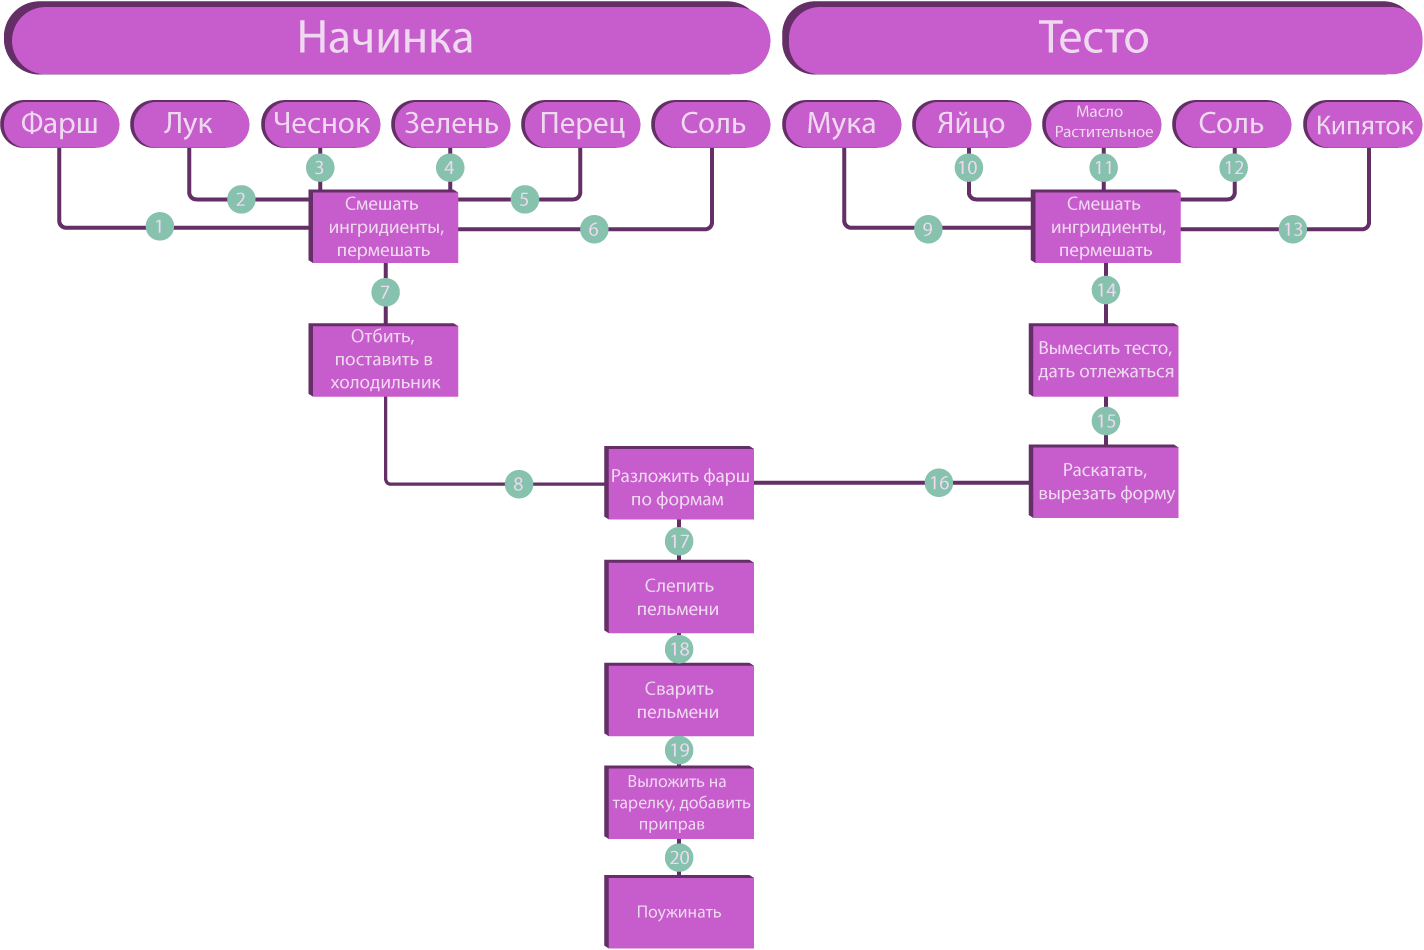

**[Zabavin]:** Но какая бизнес-составляющая в подобном описании? Такая схема отвечает на вопрос что делать, но не как. Все самые интересные бизнес-процессы находятся на ребрах данной схемы и призваны отвечать на вопрос "как это сдеать?" перед тем или иным действием.

Итак, всего 20 рёбер. Они пронумерованы. Опишем возможные вопросы, которые могут возникать на некоторых рёбрах:
- (1-6, 9-13) - "Сколько?", "В каких пропорциях?" и т.п.
- (7) - "Как отбить?", "Как долго отбивать?", "Чем?" и т.п.
- (18) - "Сколько воды для варки?", "Сколько времени?", "Когда и сколько солить?" и т.п.

Для получения валидного результата после прохождения блок-схемы необходимо отладить процессы, которые призваны отвечать на вышеприведенные вопросы. Только тогда вы получите отличные пельмени и хорошо поужинаете.

# **Дашборды**

Есть сеть пельменных, в которой люди заказывают пельмени через приложение с доставкой на дом.
В этой компании есть коммерческий директор и операционный директор.

Предложите два дашборда, позволяющие им понять все ли идет хорошо в короткой перспективе и поясните причину выбора тех или иных показателей для каждой роли. 

**[Zabavin]:**

**Операционный директор**

Основной показатель операционного директора — норма прибыли, то есть отношение фактической прибыли после выплат всех налогов к фактической выручке (валовому доходу) за месяц. Норма прибыли характеризует нормальную работу процессов (но не только её) внутри компании. Поэтому первое, за чем бы он следил, это норма прибыли.

Далее, декомпозировав норму прибыли на составляющие, можно следить и за ними. Дашборд, который я бы предложил:

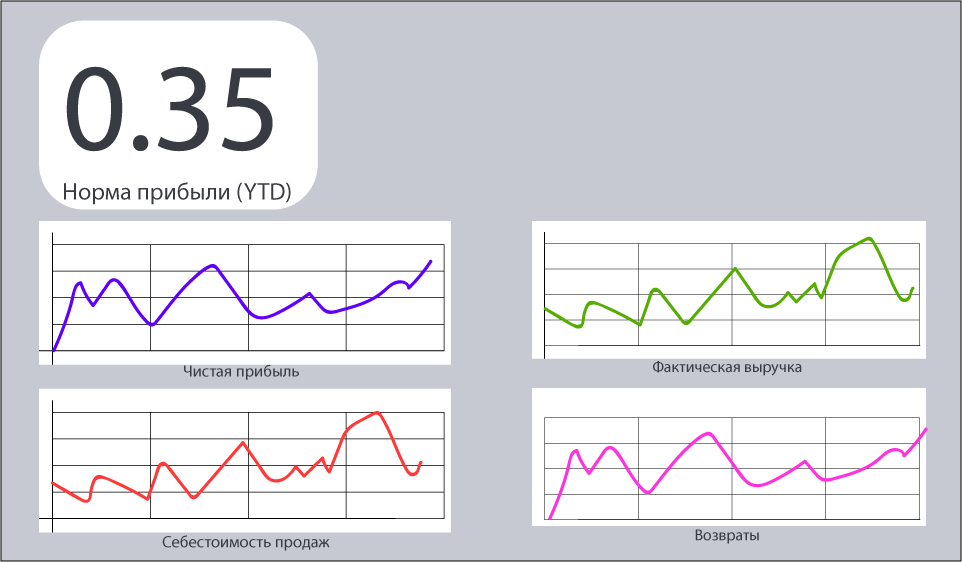

**Коммерческий директор**

Основные KPI показатели коммерческого директора:
- Увеличение числа новых точек.
- Увеличение числа новых каналов продаж (приложение).
- Рост оборота, расширение масштабов.

Поэтому на короткой перспективе полезнее всего будет анализ Customer Retention Rate (у клиентов из приложения, если нет системы лояльности в офлайн заведениях). С помощью когортного анализа для данной метрики можно будет определять эффективноть нового канала продаж, поэтому логичнее всего было бы предложить именно его.